### Letian Xu
### 03-12-2019
### I have not given or received any unauthorized assistance on this assignment.

In [1]:
import numpy as np
from random import randint

In [2]:
import matplotlib.animation as animation 

In [3]:
import matplotlib.pyplot as plt

In [4]:
def conway(s, p):
    size = s
    live_cells = round(s**2*p)
    x = [1] * live_cells + [0] * (size ** 2 - live_cells)
    np.random.shuffle(x)
    board = np.mat(x).reshape(size, size)
    
    return board

In [5]:
def update(board): 

    update = board.copy() 
    size = len(board)
    for i in range(size): 
        for j in range(size): 
  
            # compute 8-neghbor sum 
            total = int((board[i, (j-1)%size] + board[i, (j+1)%size] + 
                         board[(i-1)%size, j] + board[(i+1)%size, j] + 
                         board[(i-1)%size, (j-1)%size] + board[(i-1)%size, (j+1)%size] + 
                         board[(i+1)%size, (j-1)%size] + board[(i+1)%size, (j+1)%size])/1) 
  
            # apply Conway's rules 
            if board[i, j]  == 1: 
                if (total < 2) or (total > 3): 
                    update[i, j] = 0 
            else: 
                if total == 3: 
                    update[i, j] = 1 
  
    # update data 
    board = update
    return board 

In [6]:
def advance(b,t):
    plt.ion()
    for _ in range(t+1):
        plt.title('Iter :{}'.format(_))
        plt.imshow(b)
        b = update(b)
        plt.pause(0.2)
    
    plt.ioff()

In [7]:
board = conway(100, 0.1)

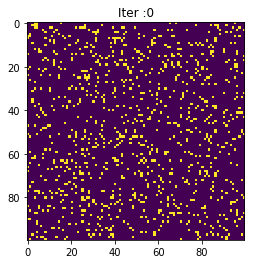

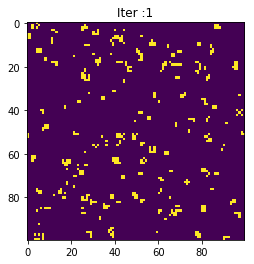

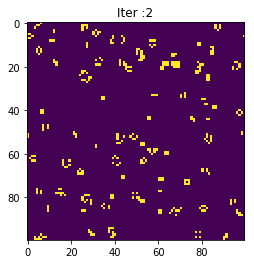

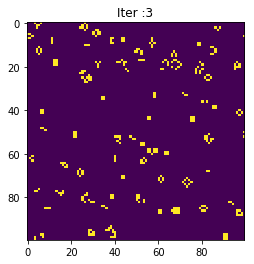

In [8]:
advance(board,3)

## Animation Visualization

In [10]:
board = conway(100, 0.1)

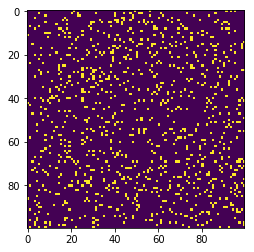

In [11]:
fig, ax = plt.subplots() 
img = ax.imshow(board) 

def init():    
    img.set_data(board)
    return img,

def plot(frame, board):
    board = update(board)
    img.set_data(board)
    return img,

ani = animation.FuncAnimation(fig, plot, frames = 100,
                              fargs=(board, ),
                              init_func=init,
                                interval=50,
                                save_count=50,
                                blit=False) 

plt.show() 

In [14]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [15]:
ani